In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [9]:
raw_dataset = pd.read_csv("dataset.csv")

In [10]:
dataset = raw_dataset.copy().drop('Serial No.', axis=1)
dataset.tail()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
495,332,108,5,4.5,4.0,9.02,1,87
496,337,117,5,5.0,5.0,9.87,1,96
497,330,120,5,4.5,5.0,9.56,1,93
498,312,103,4,4.0,5.0,8.43,0,73
499,327,113,4,4.5,4.5,9.04,0,84


In [11]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

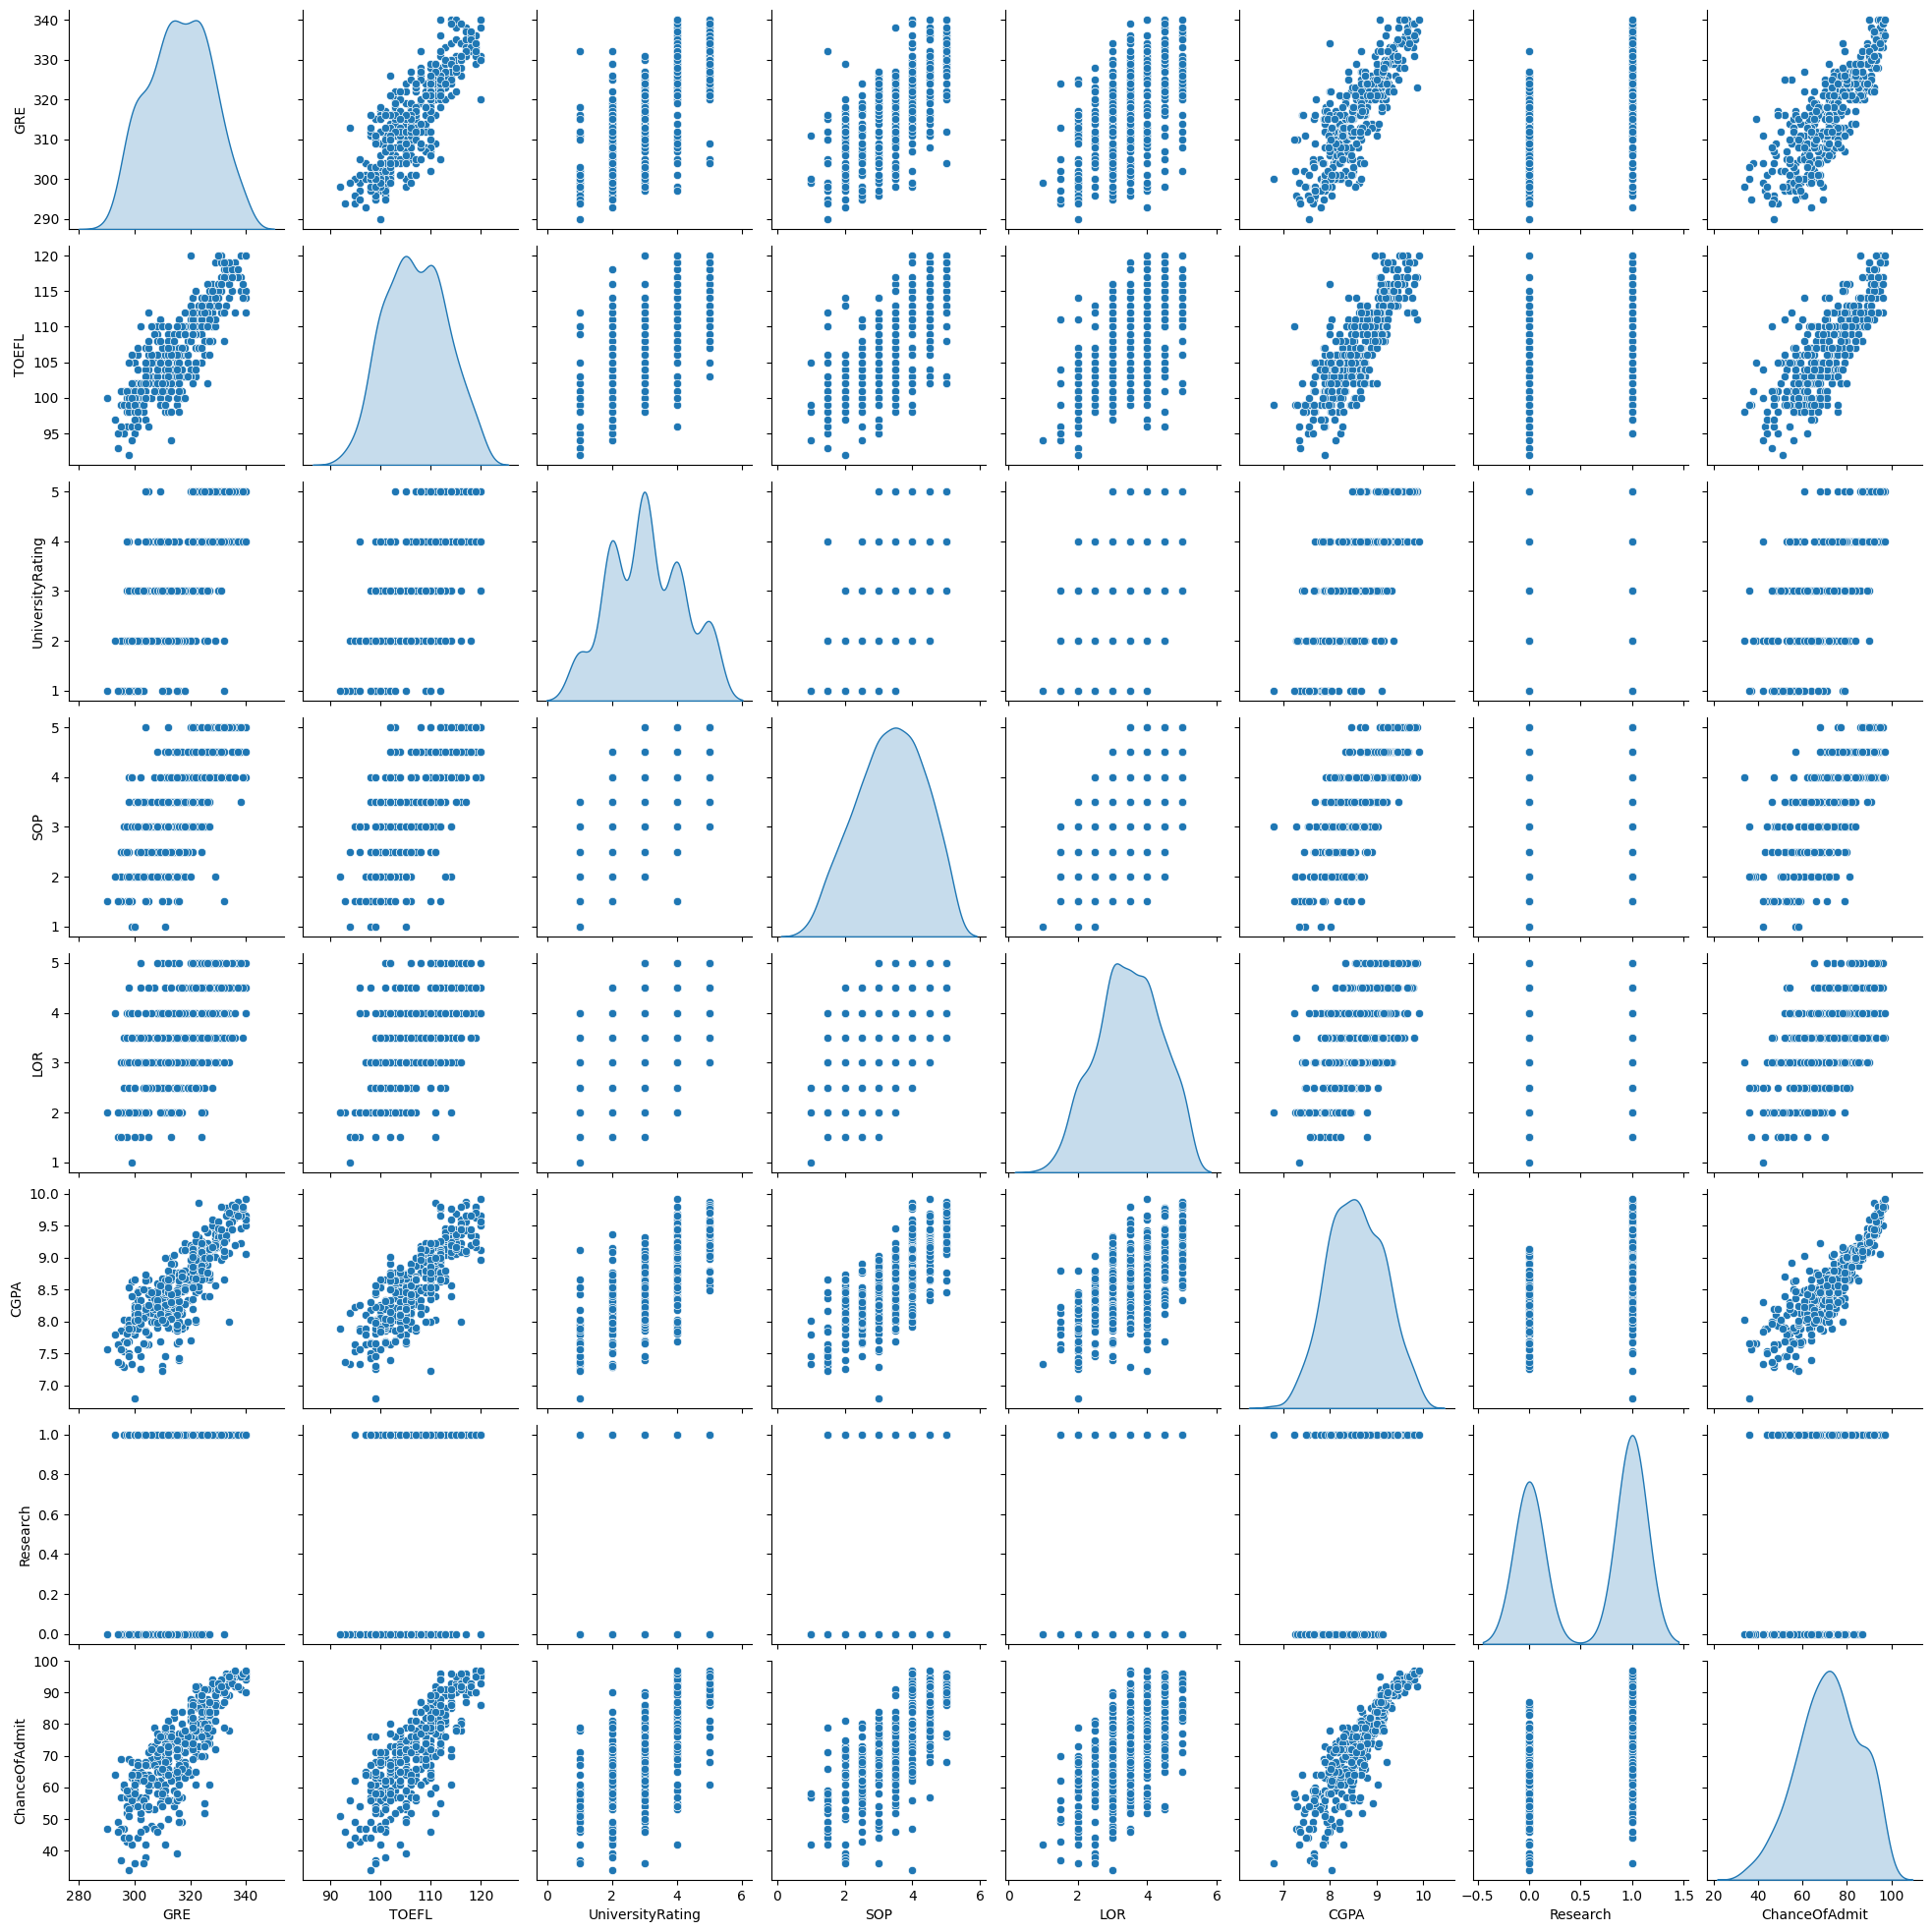

In [12]:
sns.pairplot(train_dataset
    [['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceOfAdmit']], 
    diag_kind='kde')

In [13]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GRE,400.0,316.217500,11.225651,290.0,308.00,316.00,324.25,340.00
TOEFL,400.0,107.082500,6.020907,92.0,102.00,107.00,112.00,120.00
UniversityRating,400.0,3.065000,1.126476,1.0,2.00,3.00,4.00,5.00
SOP,400.0,3.346250,0.983312,1.0,2.50,3.50,4.00,5.00
LOR,400.0,3.460000,0.902322,1.0,3.00,3.50,4.00,5.00
CGPA,400.0,8.562925,0.591376,6.8,8.12,8.54,9.02,9.92
Research,400.0,0.562500,0.496700,0.0,0.00,1.00,1.00,1.00
ChanceOfAdmit,400.0,71.857500,13.853049,34.0,63.00,72.00,82.00,97.00


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('ChanceOfAdmit')
test_labels = test_features.pop('ChanceOfAdmit')

In [15]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
GRE,316.217500,11.225651
TOEFL,107.082500,6.020907
UniversityRating,3.065000,1.126476
SOP,3.346250,0.983312
LOR,3.460000,0.902322
CGPA,8.562925,0.591376
Research,0.562500,0.496700
ChanceOfAdmit,71.857500,13.853049


In [16]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
normalizer.adapt(np.array(train_features))

In [18]:
print(normalizer.mean.numpy())

[[316.217 107.082   3.065   3.346   3.46    8.563   0.562]]


In [19]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[318.   106.     2.     4.     4.     7.92   1.  ]]

Normalized: [[ 0.16 -0.18 -0.95  0.67  0.6  -1.09  0.88]]


In [20]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [21]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[ 0.425],
       [ 0.604],
       [ 1.576],
       [ 2.347],
       [-1.383],
       [-1.712],
       [-3.316],
       [-1.237],
       [-2.994],
       [-0.306]], dtype=float32)

In [22]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (10, 7)                │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (10, 1)                │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 15 (64.00 B)

In [23]:
linear_model.layers[1].kernel

<KerasVariable shape=(7, 1), dtype=float32, path=sequential/dense/kernel>

In [24]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',)

In [25]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 71.4523 - val_loss: 70.4433
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.8144 - val_loss: 69.4894
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.0210 - val_loss: 68.5047
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.7066 - val_loss: 67.5434
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.3975 - val_loss: 66.5694
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.9110 - val_loss: 65.5901
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.2488 - val_loss: 64.6428
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.1123 - val_loss: 63.6605
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.3951 - val_loss: 62.6944
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.1151 - val_loss: 61.7224
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.7304 - val_loss: 60.7482
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4595 


In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [ChanceOfAdmit]')
  plt.legend()
  plt.grid(True)

def plot_predictions(x, y):
  p = sns.regplot(x=x, y=y)
  p.set(xlabel='Chance of Admit (actual)', ylabel='Chance of Admit (predicted)')
  slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                        y=p.get_lines()[0].get_ydata())
  print(f"y = {slope:.2f}x + {intercept:.2f}\nr={r:.2f}\nR^2 = {r**2:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
y = 0.83x + 13.36
r=1.00
R^2 = 1.00


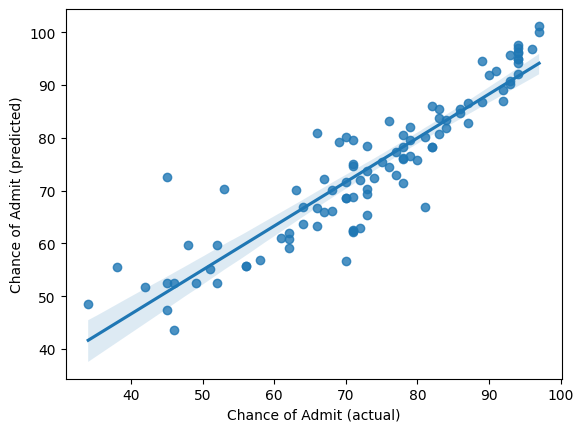

In [28]:
plot_predictions(test_labels, linear_model.predict(test_features))

In [29]:
weights = linear_model.layers[1].get_weights()[0]
bias = linear_model.layers[1].get_weights()[1]

print("Weights\n", weights)
print("Bias\n", bias)

Weights
 [[1.709]
 [2.075]
 [0.876]
 [0.524]
 [0.953]
 [6.798]
 [1.576]]
Bias
 [72.995]


In [30]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,4.201215
